## Introduction

## The Metric

The metric we decided to go with was: the best neighborhood for Spider-Man

## The Best Neighborhood

First, we will include all of our collective necessary imports.

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### The **Crime** Metric

Spiderman is most known for stopping crimes around the neighborhoods of New York, which is known for it's high crime rate. In order to find the perfect neighborhood for Spiderman, it has to have a lot of crime so that Spiderman will always have something to do around the neighborhood.  

Before we start analyzing our data, we first must do our necessary imports and create a dataframe for our arrest data.

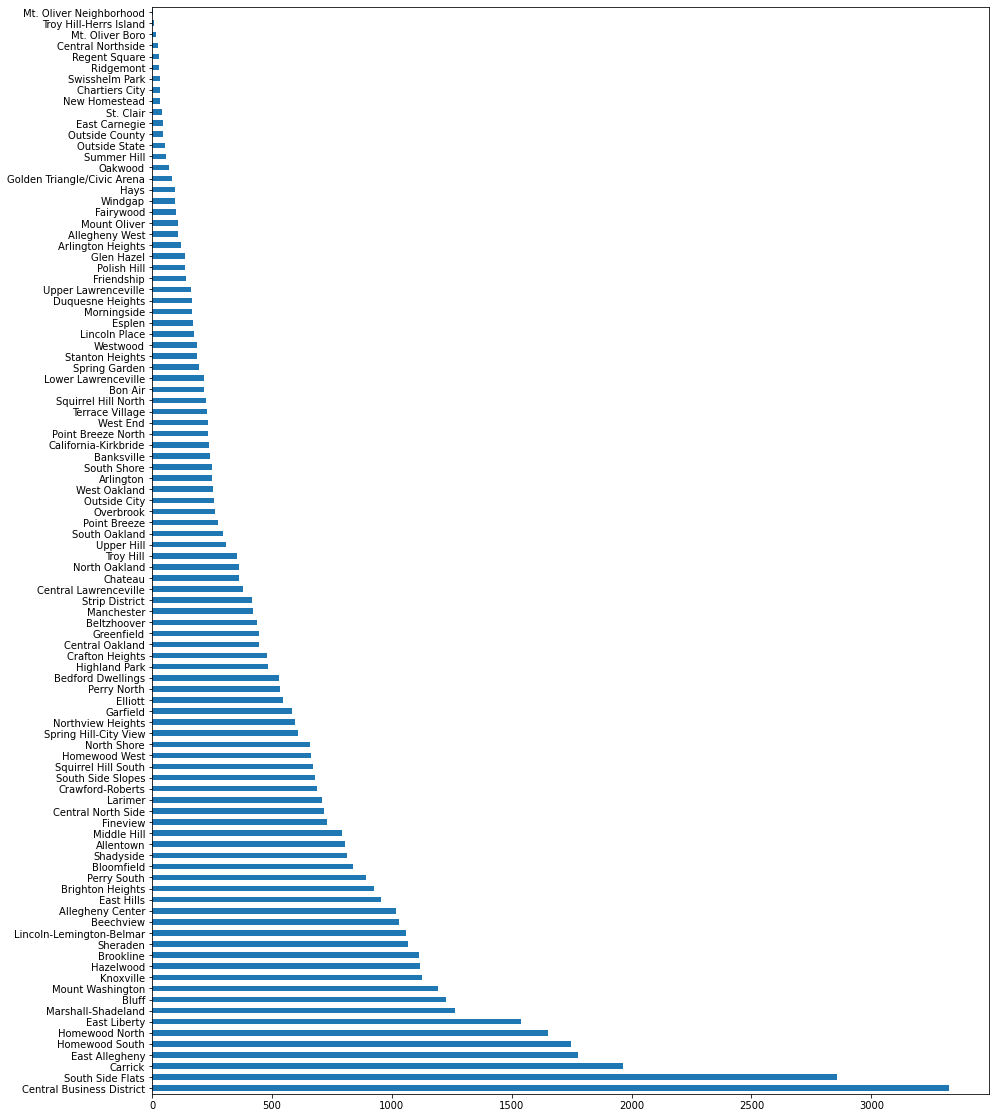

In [10]:
#dataframe for arrest data csv file
police = pd.read_csv("arrestdata.csv",sep = ",")

#Create series of all incident neighborhoods
neighborhood = police["INCIDENTNEIGHBORHOOD"]
neighborhood = neighborhood.value_counts()
#Plots the amount of times each neighborhood comes up in the series (aka when crimes are commited)
neighborhood.plot.barh(figsize = (15,20))

Wow! That's a lot of crime, but it includes too many different types of crime that are useless to Spiderman's case. So let's narrow down the crime commited to major crimes like assault or robbery to show more crime that Spiderman would try to stop.

In [11]:
arrest_dict = {}

for hood, arrest in zip(police["INCIDENTNEIGHBORHOOD"],police["OFFENSES"]):
    #Checks if the arrest is a major crime with the categories I chose 
    if (isinstance(arrest, str) and isinstance(hood, str) and ('Damages' in arrest or 'Murder' in arrest or 'Endangering' in arrest or 
    'Assault' in arrest or 'Theft' in arrest or 'Burglary' in arrest or 'Robbery' in arrest or 'Terrorist' in arrest)):
        if hood in arrest_dict and hood != '':
            arrest_dict[hood] += 1
        else:
            arrest_dict[hood] = 1

Now let's plot the new data with only the major crimes.

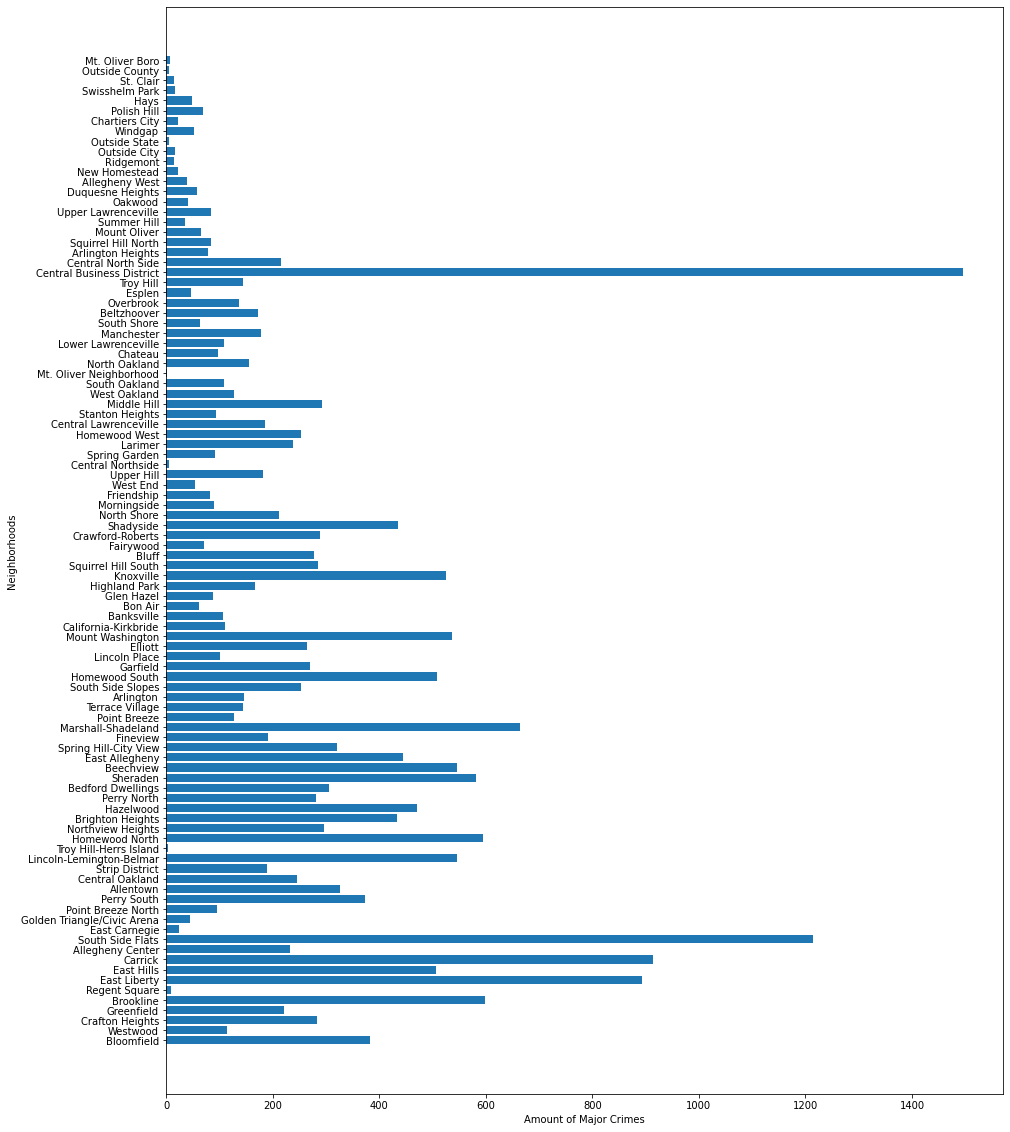

In [12]:
#creates variables for keys and values of the arrest dictionary
akeys = list(arrest_dict.keys())
avalues = list(arrest_dict.values())
plt.figure(figsize=(15,20))
#Creates horizontal bar graph
plt.barh(range(len(arrest_dict)),avalues)
plt.yticks(range(len(arrest_dict)), akeys)
plt.xlabel("Amount of Major Crimes")
plt.ylabel("Neighborhoods")
#Plots bar graph
plt.show()

In [7]:
max_value = max(avalues)
max_hood = max(arrest_dict, key=arrest_dict.get)
print("The city with the most major crimes is " + max_hood + " with " + str(max_value) + " crimes")

The city with the most major crimes is Central Business District with 1496 crimes


### The **Population** Metric

In [ ]:
area = pd.read_csv(neighborhoodareas.csv)
population = pd.read_csv(total-population.csv)
populationNew = pd.DataFrame(population,columns=['Neighborhood','Estimate; Total'])
populationNew.rename(columns = {'Estimate; Total':'Population'}, inplace = True)
pittNeighborhoods = pd.DataFrame(area, columns = ['hood', 'area'])
pittNeighborhoods['area'] = (pittNeighborhoods['area']/10000000).round(5)
pittNeighborhoods.rename(columns = {'hood':'Neighborhood', 'area':'Area'}, inplace = True)
finalPop = pd.merge(pittNeighborhoods, populationNew)
finalPop['Density'] = (finalPop['Population']/finalPop['Area']).round(5)

### The **Size** Metric

More details can be found in the **size.ipynb** notebook, so for now, we'll just pull in the necessary data we need to perform the final analysis.

First, we need to read in our data

In [7]:
# reading a csv, make sure the seperator is a comma
data = pd.read_csv("Neighborhoods.csv", sep = ",")

# read in the neighborhoods shape file for geopandas
geoData = gpd.read_file("Neighborhoods_.shp")

Next, we want to filter out the data to get the name of the neighborhood and the corresponding size data (in this case, square miles)

In [8]:
# seperate the neighborhood names and square miles from the rest of the data
hood = data[["hood", "sqmiles"]]

Now, we can plot our data to see what it looks like

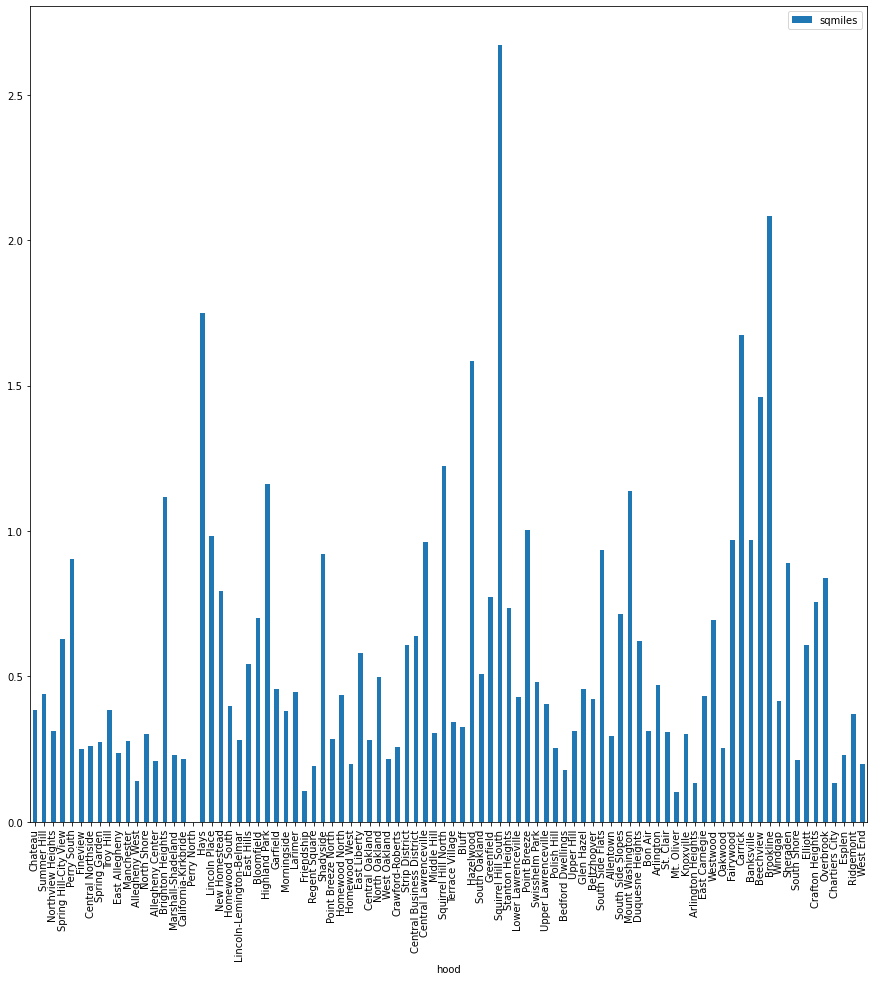

In [9]:
# plot the neighborhood data, with axis labels
hood.plot(kind = "bar", x = "hood", figsize = (15, 15))

Our data seems a bit messy and we have some outliers (Squirrel Hill South, Perry North), so let's try and clean it up a bit.  
First, let's visualize our outlier areas

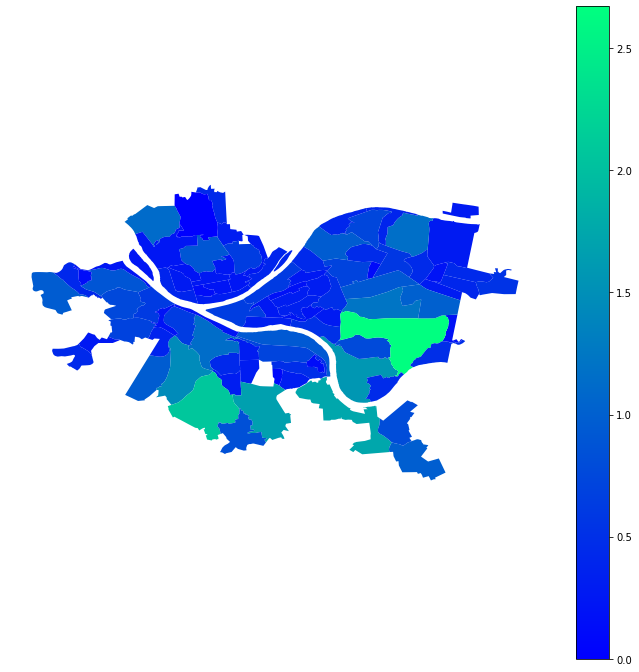

In [10]:
# get the data for square miles to be used as the geopandas column
geoHood = hood["sqmiles"]

# plot the geomap using the square miles as the column (brighter colors = more area)
geoData.plot(column = geoHood, figsize = (12, 12), legend = True, cmap = "winter").set_axis_off()

Now we can get into the statistics, and query mask the data to limit our data to be within one standard deviation of the mean. 

In [11]:
# get the average square mileage
hoodAverage = float(hood["sqmiles"].mean())

# get the standard deviation of the square mileage
hoodStandardDeviation = float(hood["sqmiles"].std())

# get the lower bound by subtracting the mean by 1 standard deviation
oneBelowMean = hoodAverage - hoodStandardDeviation

# get the upper bound by adding one standard deviation to the mean
oneAboveMean = hoodAverage + hoodStandardDeviation

# create a query mask that removes all values above the mean
queryMask1 = (hood["sqmiles"] < oneAboveMean)

# create a second query mask that removes all values below the mean
queryMask2 = (hood["sqmiles"] > oneBelowMean)

# create our final data frame combining the standard deviation query masks
filteredHood = hood[queryMask1 & queryMask2]

Now we can plot the data once again

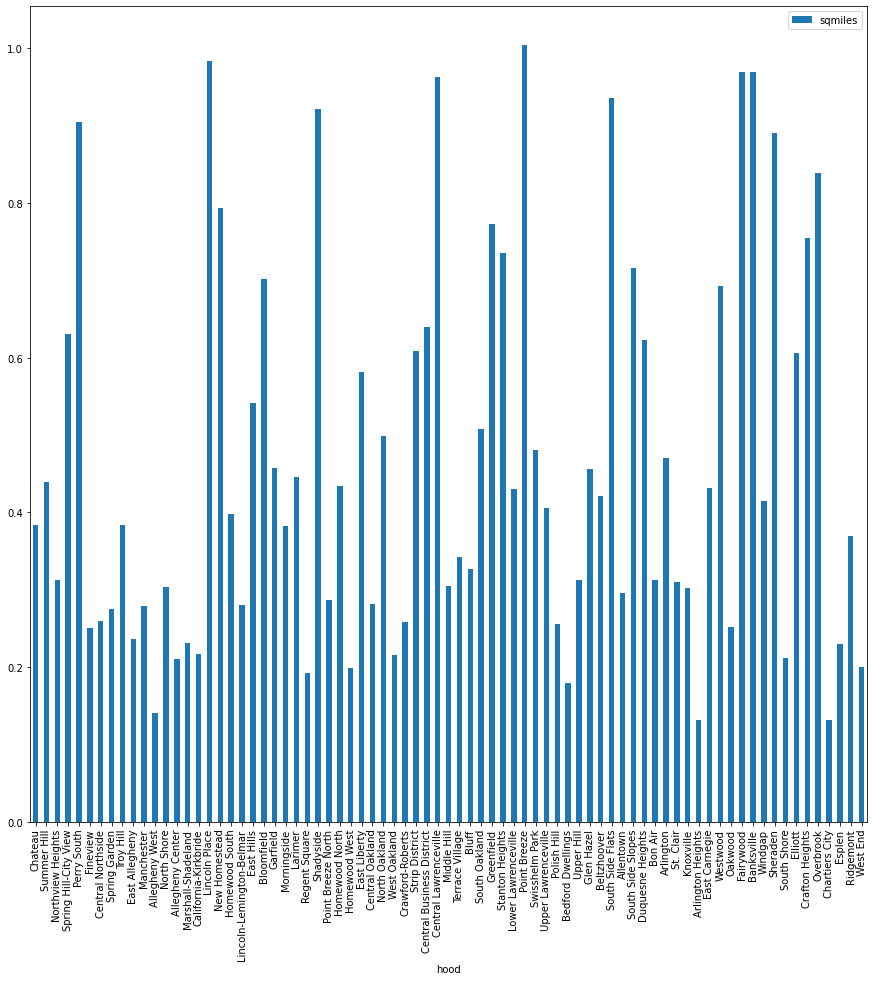

In [12]:
# plot the new data, which has been clipped to be within one standard deviation of the mean
filteredHood.plot(kind = "bar", x = "hood", figsize = (15, 15))

This time, our data looks a bit more normalized. So, let's visualize it again, this time removing the outlier neighborhoods from the map. 

In [13]:
# make a copy of our geoHood dataframe - references can be a pain!
newGeoHood = geoHood.copy()

# variable to see if we found an index that was clipped or not
found = False

# loop through the indexes of all neighborhoods
for index, entry in enumerate(hood["hood"]):
    
    # if the neighborhood is in the filtered neighborhoods, we set our found flag to true
    for fEntry in filteredHood["hood"]:
        if entry == fEntry:
            found = True
    
    # if the found flag is false, that means we filtered the neighborhood out of the data, so we set the value to 0 so it doesn't appear on the map
    if not found:
        
        # set the value of the neighborhood to 0 if it isn't in our filtered data, so that it doesn't show up on the map
        newGeoHood[index] = -1
    else:
        
        # scales the values by 5 to make the color mapping more visually different
        newGeoHood[index] *= 5
        
    # reset the found flag to false for the next iteration
    found = False

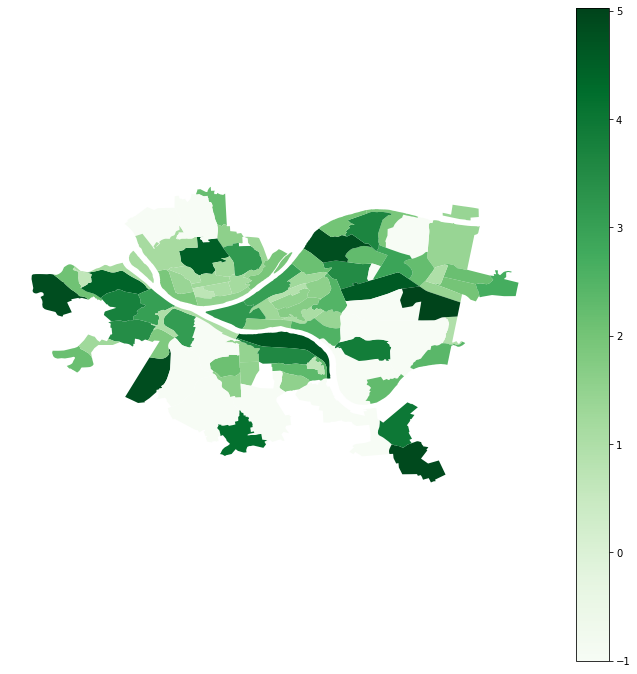

In [15]:
# plot the geo data on a map using the square mileage to determine the hue
geoData.plot(column = newGeoHood, figsize = (12, 12), legend = True, cmap = "Greens").set_axis_off()

Now that we have more reasonable data, we can narrow in on the best neighborhood. Specifically, we'll be focusing on mean and median, since Spider-Man wants a neighborhood that's neither too big nor too small, but just the right size.

In [16]:
# find the mean and median of our filtered data set
newMean = filteredHood["sqmiles"].mean()
newMedian = filteredHood["sqmiles"].median()

# print them out to the user
print("Filtered mean: " + str(newMean))
print("Filtered median: " + str(newMedian))

Filtered mean: 0.46111688311688304
Filtered median: 0.398


In [21]:
# start with the index for the mean and median neighborhood at 0
medianHoodIndex = 0
averageHoodIndex = 0

# the offset will determine which neighborhood is closest to the mean, calculated by the absolute value of the difference of the neighborhood and the mean
# we'll start with the smallest offset to be the first index
minOffset = abs(newMean - filteredHood["sqmiles"][0])

# loop through all of the neighborhoods, keeping track of the index and neighborhood name
for index, hood, size in zip(filteredHood.index, filteredHood["hood"], filteredHood["sqmiles"]):
    
    # if the size of the neighborhood is equal to our median, take note of the index
    if size == newMedian:
        medianHoodIndex = index
        
    # calculate the offset of the current neighborhood from the mean
    offset = abs(newMean - size)
    
    # if the offset is less than our minimum offset, we found a neighborhood closer to the mean, so we reset the minOffset and take note of the index
    if offset < minOffset:
        minOffset = offset
        averageHoodIndex = index

# print out our results
print(filteredHood["hood"][averageHoodIndex])
print(filteredHood["hood"][medianHoodIndex])

Garfield
Homewood South


Now that we have our mean and median neighborhoods, let's use some tricks to plot them clearly on the map. 

In [22]:
# create a copy to avoid reference issues
statGeoHood = geoHood.copy()

# loop through the indices and entries
for index, entry in enumerate(statGeoHood):
    
    # if the index we're at is the average index, set this value to 2 to show up on the map
    if index == averageHoodIndex:
        statGeoHood[index] = 2
        
    # if the index we're at is the median index, set this value to 1 to show up on the map
    elif index == medianHoodIndex:
        statGeoHood[index] = 1
        
    # if it's neither the mean nor median, set it to 0 for the background
    else:
        statGeoHood[index] = 0

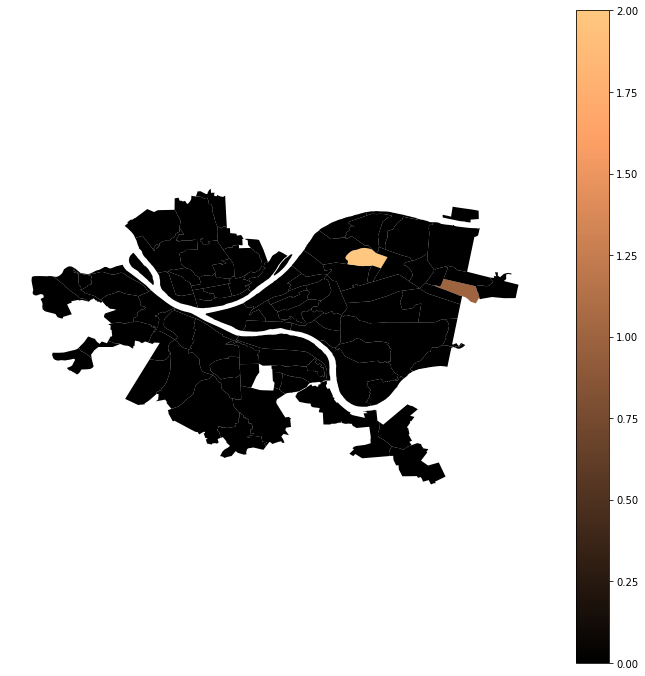

In [23]:
# plot our new data
geoData.plot(column = statGeoHood, figsize = (12, 12), legend = True, cmap = "copper").set_axis_off()

Here, our mean neighborhood is in beige (Garfield) and our median neighborhood is brown (Homewood South)

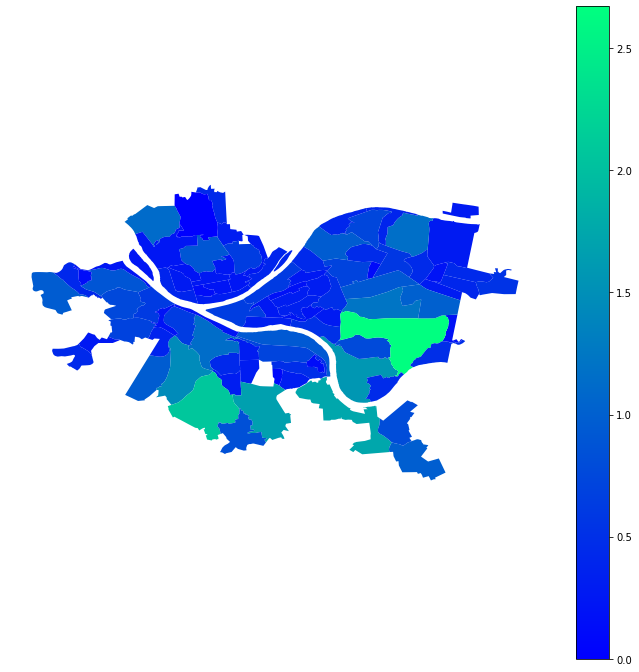

In [24]:
# plot our original data for visualization and comparison
geoData.plot(column = geoHood, figsize = (12, 12), legend = True, cmap = "winter").set_axis_off()

Combined with our initial visualization and the one previous, we can say that since Garfield is more closely connected with other neighborhoods in pittsburgh and is the mean size, **Garfield** is the winner for this metric. 

### The Final Decision

Here is where we'll combine all of our data from the three seperate metrics to perform our final analysis and pick the best Spider-Man friendly neighborhood in Pittsburgh.  

To start, let's start with the **crime** metric. For this, we're going to pull up the crime data for our two other winning neighborhoods, **Brookline** and **Garfield**, and we can see how they rank within this metric. 

In [27]:
final_data = sorted(arrest_dict, key=arrest_dict.get, reverse=True)
print('Central Business District is in 1st place' + '\nGarfield is in ' + str(int(final_data.index('Garfield')+1)) + 'st place' + '\nBrookline is in ' + str(int(final_data.index('Brookline')+1)) + 'th place')


Central Business District is in 1st place
Garfield is in 31st place
Brookline is in 6th place


Next, let's analyze the **population** metric using the two other winners, **Central Business District** and **Garfield**. 

Finally, let's analyze the **size** metric using the two winners from the other metrics, **Central Business District** and **Brookline**. 

## Conclusion